label      0
message    0
dtype: int64
ham     4825
spam     747
Name: label, dtype: int64


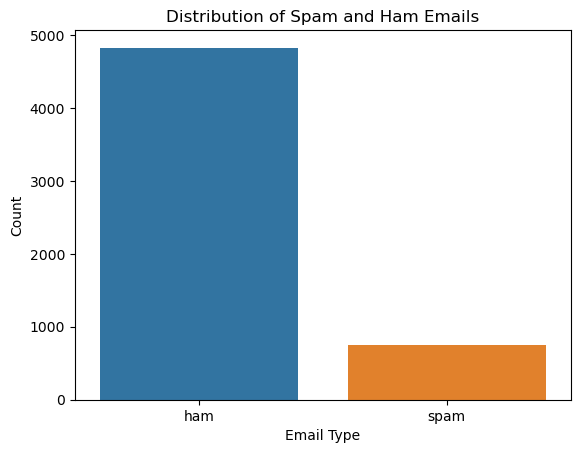

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eshan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy:  0.979372197309417
Confusion Matrix: 
 [[966   0]
 [ 23 126]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



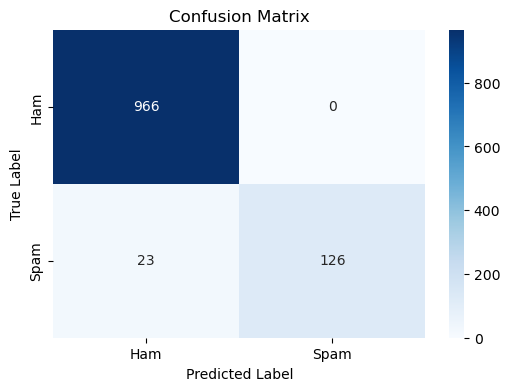

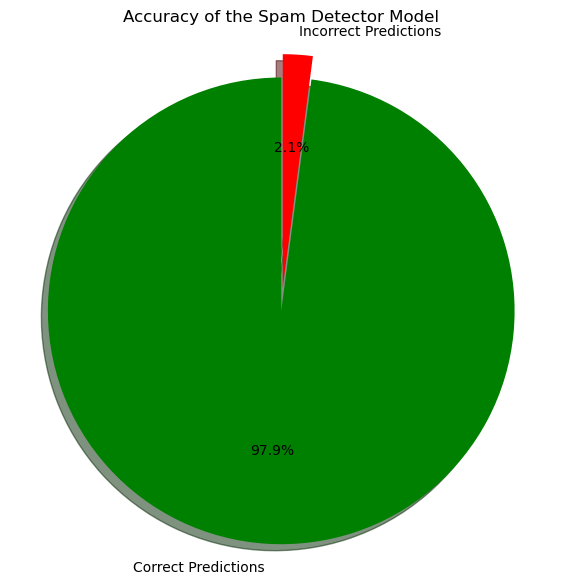

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
import string
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']] 
df.columns = ['label', 'message']
print(df.isnull().sum())  
print(df['label'].value_counts()) 
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
df['message_clean'] = df['message'].apply(preprocess_text)
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['message_clean']).toarray()
df['label_encoded'] = df['label'].map({'spam': 1, 'ham': 0})
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [accuracy * 100, (1 - accuracy) * 100]
colors = ['g', 'r']
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.title('Accuracy of the Spam Detector Model')
plt.show()
